### 領域に基づく濃淡変化(空間フィルタリング)
Chapter4では入力のある１画素の値を用いて、出力画像の対応する１画素の値が求められるようなものであった。
それに対し、ここでは、出力画像のある１画素の値を求めるために、入力画像のある領域内の画素値を用いる濃淡変換の処理について解説する。

#### 空間フィルタリング
入力画像の対応する画素だけではなく、その周囲も含めて画素地を計算する。
ここで用いられるフィルタを空間フィルタといい、線形フィルタ・非線形フィルタに大別される。

#### 平滑化
ピントが合っていないボケた画像の濃淡変化はボケていない画像に比べてなめらかである。(エッジがはっきりしていない。)
画像処理によってこのような滑らかな濃淡変化を画像に与える処理を平滑化(smoothing)と呼ぶ
平滑化は、画像に含まれるノイズなどの不要な濃淡変化を軽減するためにも用いられる
* 平均化(averaging)
* 重み付き平均化(weighted averaging)
* 特定方向の平滑化
一つは実装したい。

#### エッジ抽出
画像中で明るさが急に変化するエッジ部分を取り出すことをエッジ抽出という。
画像から特徴や図形を検知したりするための前処理としても利用される。
* 微分フィルタ
* プリューウィットフィルタ(prewitt filter)
* ソーベルフィルタ(sobel filter)
* ２時微分フィルタ(second derivative filter)・ラプラシアンフィルタ(laplacian filter)

#### 鮮鋭化
元の画像の濃淡を残したままエッジを強調することを鮮鋭化という。

#### エッジを保存した平滑化
平滑化はノイズなどの不要な濃淡変動を軽減できるが、もともとのエッジも滑らかにしてしまう。
そこで、画像のエッジは保ちつつ、ノイズによる細かな変動を平滑化する方法が提案されている。
* 局所領域の選択と平均化フィルタ
* k最近傍平均化フィルタ(k-nearest neighbor averaging filete)
* バイラテルフィルタ(bilateral filter)
* ノンローカルミーンフィルタ(non-local mean filter)
* メディアンフィルタ(median filter)

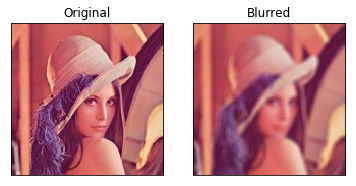

In [2]:
#平滑化　①平均化
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/Lenna.jpg')

blur = cv2.blur(img,(5,5))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

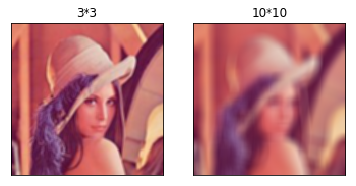

In [16]:
#平均化でフィルタの大きさを変えるとどうなるでしょうか。
img = cv2.imread('./images/Lenna.jpg')

blur = cv2.blur(img,(3,3))
blur2 = cv2.blur(img,(10,10))

blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
blur2 = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(blur),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('10*10')
plt.xticks([]), plt.yticks([])
plt.show()

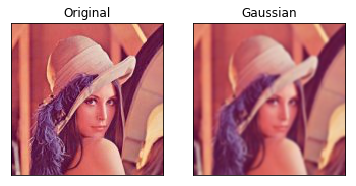

In [17]:
#平滑化②ガウシアンフィルタ
#フィルタの中心に近いほど大きな重みを付ける(ガウス分布に近づける)
img = cv2.imread('./images/Lenna.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()




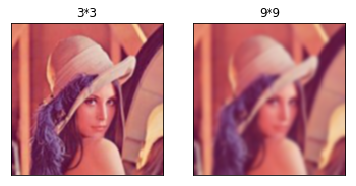

In [20]:
#フィルタの大きさを変えるとどうなるでしょうか
img = cv2.imread('./images/Lenna.jpg')

blur = cv2.GaussianBlur(img,(3,3),0)
blur2 = cv2.GaussianBlur(img,(9,9),0)

blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
blur2 = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(blur),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('9*9')
plt.xticks([]), plt.yticks([])
plt.show()

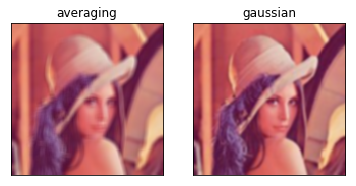

In [21]:
#平均化フィルタとガウシアンフィルタの見え方はどうでしょうか
img = cv2.imread('./images/Lenna.jpg')

blur = cv2.blur(img,(5,5))
blur2 = cv2.GaussianBlur(img,(5,5),0)

blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
blur2 = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(blur),plt.title('averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

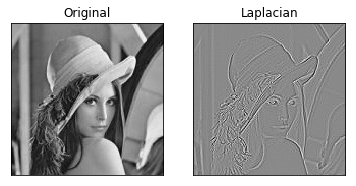

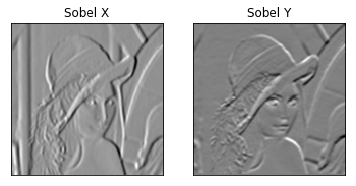

In [3]:
#ラプラシアン、ソーベルフィルタ
img = cv2.imread('./images/Lenna.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

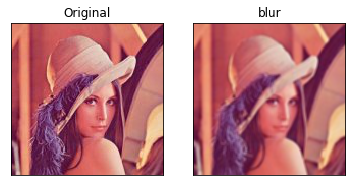

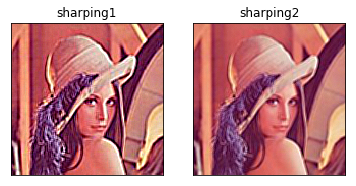

In [4]:
#先鋭化(Sharpness)
#(中央に大きな値、周囲は小さな値？)
img = cv2.imread('./images/Lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.blur(img,(3,3))

kernel1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]], np.float32)
kernel2 = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]], np.float32)

dst1 = cv2.filter2D(blur, -1, kernel1)
dst2 = cv2.filter2D(blur, -1, kernel2)

plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(blur)
plt.title('blur'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(1,2,1),plt.imshow(dst1)
plt.title('sharping1'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(dst2)
plt.title('sharping2'), plt.xticks([]), plt.yticks([])
plt.show()   


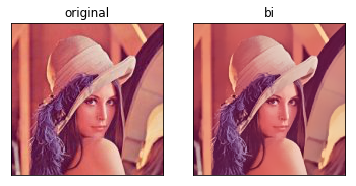

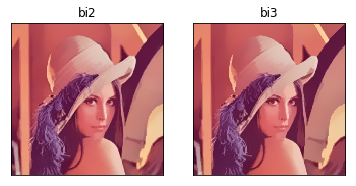

In [5]:
#エッジを保存した平滑化
#バイラテルフィルタ
img = cv2.imread('./images/Lenna.jpg', cv2.IMREAD_COLOR)
bi = cv2.bilateralFilter(img, 15, 20, 20)
bi2 = cv2.bilateralFilter(bi, 15, 20, 20)
bi3 = cv2.bilateralFilter(bi2, 15, 20, 20)

plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(bi, cv2.COLOR_BGR2RGB))
plt.title("bi")
plt.xticks([]),plt.yticks([])
plt.show()
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(bi2, cv2.COLOR_BGR2RGB))
plt.title("bi2")
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(bi3, cv2.COLOR_BGR2RGB))
plt.title("bi3")
plt.xticks([]),plt.yticks([])
plt.show()

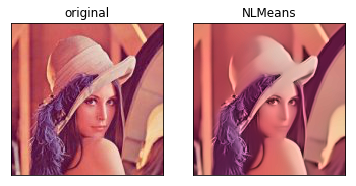

In [43]:
#ノンローカルミーンフィルタ？
img = cv2.imread('./images/Lenna.jpg', cv2.IMREAD_COLOR)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)


plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("NLMeans")
plt.xticks([]),plt.yticks([])

plt.show()
